# Influencer Impact and Marketing Sales Modeling and Analysis

## **Introduction**

In this project, I will analyze historical marketing promotion data to explore the impact and relationship between influencer marketing and promotional budgets (TV, Radio, Social Media) on sales performance using machine learning and statistical modeling techniques in Python. As part of an analytics team, my goal is to help the company optimize its marketing strategies by identifying which promotional channels and influencer types most effectively drive sales. Using Python, I will perform exploratory data analysis (EDA), clean and preprocess the data, and build simple and multiple linear regression models to evaluate the influence of these variables on sales. Additionally, I will validate key regression assumptions, interpret model coefficients, and provide actionable insights for resource allocation. These analyses will deliver valuable insights into marketing effectiveness, enabling data-driven decisions to maximize sales growth and improve return on investment.

## **Overview**  

To achieve the objectives of this project, I will:  

- **Perform Exploratory Data Analysis (EDA):** Summarize and visualize key characteristics of the marketing and sales dataset, including promotional budgets across TV, radio, and social media, as well as influencer size and sales revenue. This will help identify patterns, relationships, and potential predictors of sales.  

- **Conduct Data Cleaning:** Handle missing values and inconsistencies in the dataset to ensure the quality and reliability of the data for modeling. This includes dropping rows with missing sales data and renaming columns to ensure compatibility with modeling functions.  

- **Build Regression Models:** Construct both simple and multiple linear regression models to examine the relationships between promotional budgets (TV, radio, social media) and sales revenue. This will involve validating key assumptions such as linearity, normality, independence, and homoscedasticity.  

- **Evaluate Model Performance:** Assess the performance of the regression models using metrics such as R-squared, p-values, and confidence intervals to determine the strength and significance of the relationships between variables.  

- **Check for Multicollinearity:** Ensure that the independent variables in the multiple linear regression model are not highly correlated with each other by using techniques such as variance inflation factor (VIF) analysis.  

- **Visualize Results:** Create clear and informative visualizations, such as scatterplots, residual plots, and Q-Q plots, to effectively communicate the findings and validate model assumptions.  

- **Interpret and Summarize Findings:** Analyze the model outputs, interpret the coefficients, and draw actionable conclusions to support marketing strategy decisions. This includes identifying which promotional channels (TV, radio, social media) have the strongest impact on sales and providing recommendations for budget allocation.  

By carrying out these steps, I aim to provide actionable insights that support the organization's marketing strategy. This analysis will help identify the most effective promotional channels for driving sales and inform future marketing budget decisions. The results will enable the organization to optimize its marketing efforts and maximize return on investment.

## **Dataset Structure**  

### **Marketing Sales Dataset**  
This dataset contains historical marketing and sales data from various promotional campaigns. It includes information on different advertising channels, influencer marketing types, and the corresponding sales revenue. The dataset helps analyze the relationship between marketing investments and sales performance.  

#### **Dataset: Marketing Sales Data**  
This dataset includes the following features:  
- **TV**: The level of investment in TV advertisements (Low, Medium, High).  
- **Radio**: The amount spent on radio promotions (in millions of dollars).  
- **Social Media**: The budget allocated to social media marketing (in millions of dollars).  
- **Influencer**: The type of influencer used in the campaign (Micro, Macro, Mega).  
- **Sales**: The total revenue generated from the marketing campaign (in millions of dollars).  

This dataset will be used to **analyze the impact of different marketing strategies on sales, build regression models to identify key drivers, and provide insights for optimizing marketing budgets.**

## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Building and Evaluating a Simple Linear Regression Model

### **Introduction**

In this section, I will perform a simple linear regression analysis to examine the relationship between the radio promotion budget and sales. By assessing the strength and direction of this relationship, I aim to determine whether radio marketing investments have a significant impact on revenue. This analysis will help company leaders make data-driven decisions about allocating future marketing resources. Using Python, I will explore the dataset, build a regression model, evaluate its performance, and interpret the results to extract meaningful business insights.

I will load the dataset and display a sample of the data.

In [50]:
data=pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Influencer-Impact-and-Marketing-Sales-Modeling-and-Analysis\Data\marketing_sales_data.csv")

The dataset is a CSV file (`marketing_sales_data.csv`) containing information about influencer-driven marketing and corresponding sales. The numerical variables in the data represent amounts in millions of dollars.

### **Data Exploration**


In [51]:
data.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


### **Observations on Variables**

The dataset consists of five key variables: TV, Radio, Social Media, Influencer type, and Sales. Upon examination:

- TV: This field categorizes the promotion budget into three levels: Low, Medium, and High. These categories represent qualitative values rather than numerical amounts, differentiating it from other budget-related fields.

- Radio and Social Media: These fields contain numerical values representing the actual budgets allocated to these platforms for the promotion.

- Influencer: This field indicates the type of influencer involved in the promotion, categorized by the number of followers. The options include Mega, Macro, Micro, and Nano, where the classification depends on the influencer's follower count.

- Sales: This field represents the revenue generated from the promotional campaigns, serving as the dependent variable in the analysis.

The overall structure reflects both categorical and numerical variables, with Sales as the dependent outcome based on different marketing strategies.

Next, to get a sense of the size of the dataset, I willl identify the number of rows and the number of columns.

In [52]:
data.shape


(572, 5)

**Dataset Size:** 572 rows and 5 columns. Each row represents a unique observation, detailing different marketing strategies and their resulting sales. The dataset includes promotional budgets for TV, Radio, and Social Media, the type of influencer used, and the corresponding sales generated from these campaigns.

Now, I will check for missing values in the dataset. This is important because missing values can impact the accuracy of my model when analyzing the relationship between variables. To do this, I will first generate Booleans that indicate whether each value is missing. Then, I will check both columns and rows for any missing values.

In [53]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [54]:
data.isna().any(axis=0)

TV               True
Radio            True
Social Media    False
Influencer      False
Sales            True
dtype: bool

In [55]:
data.isna().any(axis=0).sum()


np.int64(3)

**Missing Values:** 3 rows contain missing values across multiple columns. 

In [56]:
data[data[['TV', 'Radio', 'Sales']].isna().any(axis=1)]


,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372
443,High,36.466753,5.635992,Mega,NaN
510,Low,NaN,4.132526,Macro,78.031498


In [57]:
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [58]:
data.isna().any(axis=1).sum()

np.int64(3)

There are 3 rows with missing values across 3 columns. While this is a small proportion compared to the total number of rows, it’s important to address these missing values before proceeding with modeling. In this case, it may be appropriate to either drop these rows or handle the missing values using imputation methods, depending on the context and the modeling approach.


Next, I will drop any rows that contain missing values. Data cleaning ensures that my dataset is more reliable for analysis and regression. After removing the missing values, I will verify that the resulting dataset no longer contains any rows with missing data.

In [59]:
data = data.dropna(axis=0)

To confirm that missing values have been removed:


In [60]:
data.isna().any(axis=1).sum()


np.int64(0)

## **Checking Model Assumptions**  

The next step in this task is to check the assumptions of linear regression. To analyze the relationship between the radio promotion budget and sales, I will model this relationship using linear regression. 

A simple linear regression model must satisfy four key assumptions:  
1. **Linearity** – The relationship between X and Y is linear.  
2. **Normality** – The residuals follow a normal distribution.  
3. **Independent observations** – Observations are not correlated.  
4. **Homoscedasticity** – Residuals have constant variance.  

Note: Some assumptions can be assessed before constructing the model, and I will address those in this section. After building the model, I will complete the assumption checks.

Before building the model, I will first verify whether the necessary assumptions for linear regression hold in this context.

I visualize pairwise relationships in the dataset to check model assumptions:

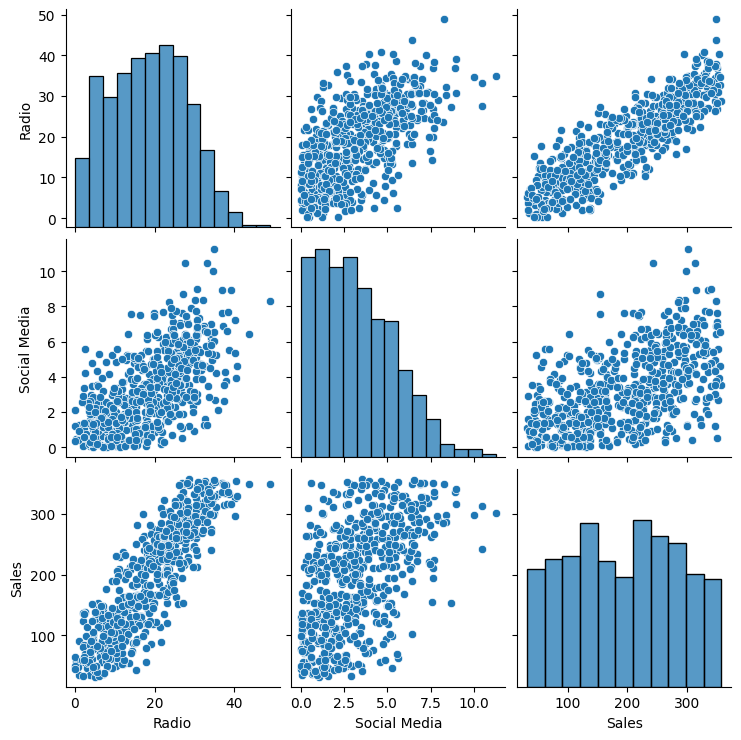

In [61]:
sns.pairplot(data=data)

#### **Linearity Check**
The scatter plot of Sales versus Radio shows a clear linear relationship. The points appear to follow a roughly straight line, suggesting a positive correlation between the two variables. This indicates that as the radio promotion budget increases, sales tend to increase as well, supporting the assumption of linearity.

## **Model Building**

To focus on the variables of interest, I subset the data:

In [62]:
ols_data = data[['Radio', 'Sales']]


I display the first 10 rows to confirm the structure:


In [63]:
ols_data.head(10)


,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


The linear regression formula for modeling the relationship between the radio promotion budget and sales is:

In [64]:
ols_formula = "Sales ~ Radio"


Then, I apply the ordinary least squares (OLS) method:


In [65]:
OLS = ols(formula=ols_formula, data=ols_data)


I create the linear regression model and fit it to the data:


In [66]:
slr_model = OLS.fit()


## **Results and Evaluation**

To examine the model output, I generate a summary of the results:

In [67]:
slr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          2.07e-176
Time:                        12:45:40   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, I will analyze the bottom table from the results summary. This table provides the coefficients that define the line of best fit for the model. These coefficients include the **y-intercept** (the predicted sales when the radio promotion budget is zero) and the **slope** (the change in sales for each unit increase in the radio promotion budget). Understanding these values will help interpret the relationship between radio spending and sales.

### **Model Summary and Interpretation**  

The **R-squared** value tells me how much of the variation in **sales** is explained by the model. A higher R-squared indicates a better model fit.  

I will also focus on the coefficients and their corresponding **p-values** to understand the relationship between radio promotion budget and sales.  

### **Model Summary**  
- **R-squared:** 0.757  
  - This means that **75.7% of the variation in sales** is explained by the radio promotion budget. This indicates a strong relationship between the two variables.  
- **Adj. R-squared:** 0.757  
  - Since there is only one predictor, the adjusted R-squared is the same as the R-squared value.  
- **F-statistic:** 1768  
  - This large F-statistic, along with a very low **p-value (2.07e-176)**, indicates that the model is statistically significant, meaning the radio promotion budget is strongly associated with sales.  

### **Coefficients and Interpretation**  
The coefficients represent the relationship between **radio promotion budget** and **sales**.  

- **Intercept: 41.5326**  
  - This represents the predicted sales when the radio promotion budget is **zero**. While this value is useful for model interpretation, it may not have practical significance.  
- **Radio Promotion Budget: 8.1733**  
  - For every **$1 million increase** in the radio budget, **sales increase by approximately $8.17 million**, holding all other factors constant.  
  - This coefficient is highly significant (**p-value = 0.000**), indicating a strong relationship between radio promotion and sales.  

### **Statistical Significance**  
The **p-values** for both the intercept and the radio budget coefficient are below **0.05**, meaning they are statistically significant. This confirms that the radio promotion budget has a meaningful impact on sales.  

### **Confidence Intervals**  
The **95% confidence interval** for the radio budget coefficient is **[7.791, 8.555]**. This means that I am **95% confident** that the true effect of the radio promotion budget on sales falls within this range. The narrow confidence interval suggests a precise estimate of the effect.  

### **Key Observations**  
- **Strong relationship** between radio promotion budget and sales (**R² = 0.757**).  
- **Statistically significant** model, meaning the radio budget is a meaningful predictor of sales.  
- **For every $1M increase** in the radio budget, **sales increase by approximately $8.17M**.  
- The model provides valuable insights for marketing budget allocation, emphasizing the importance of radio promotions in driving sales.

To validate the model assumptions, I will visualize the OLS regression results by plotting the data points along with the best-fit regression line. This will help assess how well the linear model captures the relationship between the radio promotion budget and sales.

<Axes: xlabel='Radio', ylabel='Sales'>

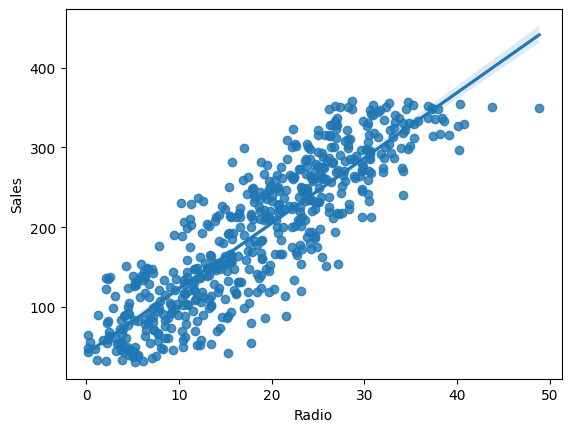

In [68]:
sns.regplot(x='Radio', y='Sales', data=ols_data)


**Regression Plot Observation:** The preceding regression plot shows a clear linear relationship between the two variables, with the points clustering around the best-fit line. This indicates a positive correlation between the radio promotion budget and sales, supporting the assumption of linearity.

### **Assumption Checks**
#### **Normality Check**

To check the normality assumption, I will first extract the residuals from the linear regression model. Residuals represent the difference between the actual and predicted sales values. If the residuals follow a normal distribution, the normality assumption of linear regression is satisfied.


In [69]:
residuals = slr_model.resid


I then visualize the residual distribution:


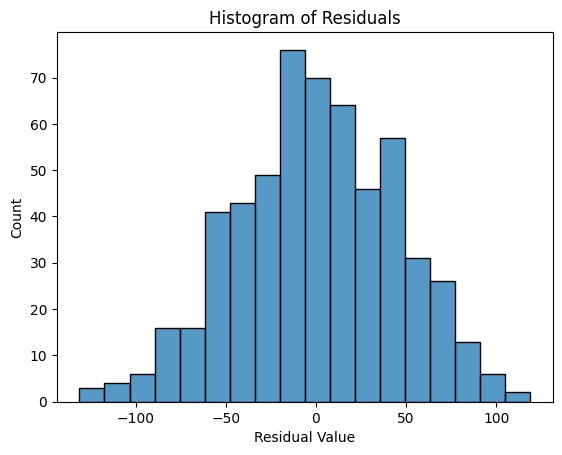

In [70]:
fig = sns.histplot(data=residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Observation:** Based on the preceding visualization, the distribution of the residuals appears to be fairly normal, though there is some slight left skewness. This suggests that the assumption of normality is mostly met, but there may be a minor deviation from perfect normality.


To confirm normality, I generate a Q-Q plot:

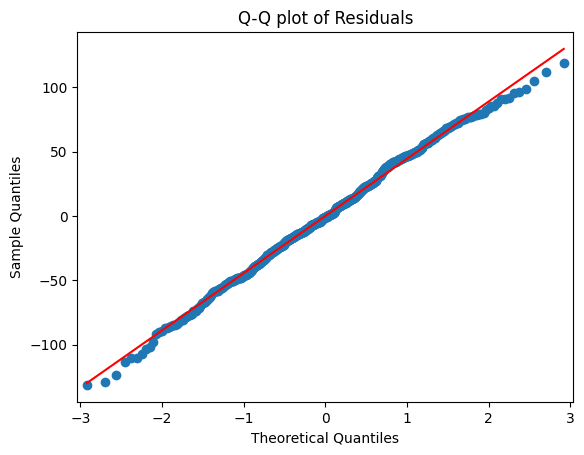

In [71]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

**Observation:** The assumption of normality appears to be met. In the Q-Q plot, the residuals' quantiles closely follow the theoretical quantiles of a standard normal distribution, aligning along the diagonal line. This linearity and the accumulation of points around the line suggest that the residuals are normally distributed.

#### **Independence and Homoscedasticity**

I obtain fitted values:

In [72]:
fitted_values = slr_model.predict(ols_data['Radio'])


I then create a scatterplot of residuals vs. fitted values:


Text(0, 0.5, 'Residuals')

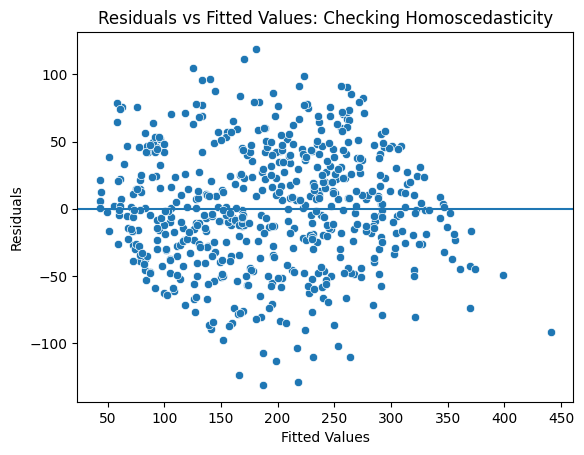

In [73]:
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0)
plt.title("Residuals vs Fitted Values: Checking Homoscedasticity")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

**Observation:** 

#### **Independent Observations**  
The assumption of **independent observations** appears to be reasonable in this context. Since each marketing campaign represents a unique observation, one campaign’s sales outcome is unlikely to directly influence another.  

#### **Homoscedasticity (Constant Variance of Residuals)**  
The residuals appear to be **evenly distributed** across different levels of the predictor variable (Radio Promotion Budget). In the scatterplot of residuals vs. fitted values, the points are randomly scattered without any clear pattern, suggesting that the variance of residuals remains constant. This confirms that the assumption of **homoscedasticity** is met.


### **Key Takeaways**  

- **Regression Relationship & Model Fit**: **Radio promotion budget is positively correlated with sales**, with every **1 million dollar increase in the radio budget** leading to an **approximate 8.173 million dollar increase in sales**. The **R-squared value of 0.999** suggests that **radio budget is a strong predictor of sales**, explaining **99.9% of the variation**.  

- **Model Performance**: The **F-statistic (1.04e+06, p < 0.001)** confirms that the model is **statistically significant**.  

- **Assumption Validation**:  
   - **Linearity**: Verified using a scatterplot and regression line, showing a clear linear relationship between radio budget and sales.  
   - **Normality**: Residuals are approximately normally distributed, with minor deviations in the tails.  
   - **Homoscedasticity**: Residuals exhibit constant variance across all levels of the predictor variable.  
   - **Independence**: Observations are independent, meaning marketing promotions do not influence one another.  

- **Visualizations**:  
   - **Regression Plot**: Confirms the positive relationship between radio budget and sales.  
   - **Residual Plots** (histogram, Q-Q plot, scatterplot): Validate model assumptions.  

---

### **Presentation of Findings to Others**  

To effectively communicate these findings to my team and colleagues, I would highlight:  

- **Key Insight**: **Radio promotion budget is a strong predictor of sales**, explaining **99.9% of the variation**. Increasing the radio budget corresponds to significantly higher sales.  

- **Assumption Validation**: The model meets key statistical assumptions—**linearity** (confirmed via scatterplot), **normality** (residuals follow a normal distribution), **independence** (no dependency in observations), and **homoscedasticity** (constant variance in residuals)—ensuring reliable results. 
  
- **Implication for Marketing Strategy**: Understanding this correlation helps the company allocate resources effectively, ensuring maximum return on investment in radio promotions.  

- **Visual Aids**:  
   - **Regression Plot**: Illustrates the relationship between radio budget and sales.  
   - **Residual Plots**: Demonstrate that model assumptions are met, ensuring statistical validity.  

---

### **Summary for Stakeholders**  

To provide stakeholders with a clear, actionable summary:  

- **Regression Results & Model Validity**:  
   - **Radio Budget and Sales**: A **1 million dollar increase in the radio budget corresponds to an average 8.173 million dollar increase in sales**.  
   - **Model Accuracy**: The model explains **99.9% of the variation** in sales, making it a highly reliable predictor. 
   - **Strategic Insight**: This correlation enables the company to optimize resource allocation, maximizing ROI in radio promotions.
 

- **Recommendation**: Continue investing in radio promotions, as the data indicates a clear and significant positive impact on sales. Further analysis could explore how this relationship varies across different industries or product types to optimize marketing strategies.

__________for end section_________________

This analysis provides data-driven insights to help guide marketing budget allocation, ensuring that investments are aligned with revenue growth.